# import data and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
#folder shortcut
path = r'/Users/drich/Desktop/Citi Bike'

In [4]:
citi = pd.read_csv(os.path.join(path, '02 Data','Prepared data', 'OGCiti_bike.csv'), index_col = False)

In [7]:
station = citi[['start_station_id', 'start_station_latitude', 'start_station_longitude']]

In [8]:
station.head()

start_station_id  start_station_latitude  start_station_longitude
0               523               40.754666               -73.991382
1               257               40.719392               -74.002472
2               479               40.760193               -73.991255
3               527               40.743156               -73.974347
4               293               40.730287               -73.990765

In [9]:
# SAVE AND EXPORT DF
station.to_csv(os.path.join(path, '02 Data','Prepared data', 'Bike_Station.csv'))

In [10]:
station =pd.read_csv(os.path.join(path, '02 Data','prepared data', 'bike_station.csv'), index_col = False)

In [11]:
station.head()

Unnamed: 0  start_station_id  start_station_latitude  \
0           0               523               40.754666   
1           1               257               40.719392   
2           2               479               40.760193   
3           3               527               40.743156   
4           4               293               40.730287   

   start_station_longitude  
0               -73.991382  
1               -74.002472  
2               -73.991255  
3               -73.974347  
4               -73.990765

In [18]:
columns_to_drop_1=['Unnamed: 0']

In [ ]:
station= station.drop(columns_to_drop_1, axis=1)

In [10]:
station

Unnamed: 0  start_station_id  start_station_latitude  \
0             0                72               40.767272   
1             1                79               40.719116   
2             2                82               40.711174   
3             3                83               40.683826   
4             4               116               40.741776   
..          ...               ...                     ...   
325         325              2017               40.750224   
326         326              2021               40.759291   
327         327              2022               40.758491   
328         328              2023               40.759681   
329         329              3002               40.711512   

     start_station_longitude  average_daily_rides  
0                 -73.993929             5.642857  
1                 -74.006667             4.357143  
2                 -74.000165             2.185185  
3                 -73.976323             2.571429  
4                 -74.001497             8.966667  
..                       ...                  ...  
325               -73.971214             3.000000  
326               -73.988597             5.357143  
327               -73.959206             3.310345  
328               -73.970314             3.217391  
329               -74.015756             6.766667  

[330 rows x 5 columns]

In [15]:
citi.columns

Index(['Unnamed: 0', 'day_of_week', 'start_hour', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'trip_duration',
       'subscriber', 'birth_year', 'gender', 'start_of_ride', 'end_of_ride'],
      dtype='object')

In [20]:
citi_1= citi[['day_of_week','start_hour',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'trip_duration',
       'subscriber', 'birth_year', 'gender', 'start_of_ride', 'end_of_ride']]

In [13]:
citi_1

day_of_week  start_hour  start_station_id       start_station_name  \
0             Mon          18               523          W 38 St & 8 Ave   
1             Thu          18               257  Lispenard St & Broadway   
2             Wed          19               479          9 Ave & W 45 St   
3             Sat          11               527          E 33 St & 1 Ave   
4             Fri          22               293    Lafayette St & E 8 St   
...           ...         ...               ...                      ...   
42988         Sat          15               435          W 21 St & 6 Ave   
42989         Sun          16               224    Spruce St & Nassau St   
42990         Sat          17               261     Johnson St & Gold St   
42991         Sat          18               402       Broadway & E 22 St   
42992         Mon          21               515         W 43 St & 10 Ave   

       start_station_latitude  start_station_longitude  end_station_id  \
0                   40.754666               -73.991382             334   
1                   40.719392               -74.002472             236   
2                   40.760193               -73.991255             513   
3                   40.743156               -73.974347             441   
4                   40.730287               -73.990765             432   
...                       ...                      ...             ...   
42988               40.741740               -73.994156             448   
42989               40.711464               -74.005524             301   
42990               40.694749               -73.983625             151   
42991               40.740343               -73.989551             524   
42992               40.760094               -73.994618             488   

               end_station_name  end_station_latitude  end_station_longitude  \
0               W 20 St & 7 Ave             40.742388             -73.997262   
1           St Marks Pl & 2 Ave             40.728419             -73.987140   
2              W 56 St & 10 Ave             40.768254             -73.988639   
3               E 52 St & 2 Ave             40.756014             -73.967416   
4             E 7 St & Avenue A             40.726218             -73.983799   
...                         ...                   ...                    ...   
42988          W 37 St & 10 Ave             40.756604             -73.997901   
42989         E 2 St & Avenue B             40.722174             -73.983688   
42990  Cleveland Pl & Spring St             40.721816             -73.997203   
42991           W 43 St & 6 Ave             40.755273             -73.983169   
42992           W 39 St & 9 Ave             40.756458             -73.993722   

       trip_duration  subscriber  birth_year  gender           ride_start  \
0                993  Subscriber      1968.0       2  2013-09-09 18:18:55   
1                581  Subscriber      1983.0       1  2013-09-12 18:38:53   
2                361  Subscriber      1989.0       1  2013-09-18 19:44:04   
3                561  Subscriber      1988.0       2  2013-09-28 11:54:37   
4                427  Subscriber      1986.0       2  2013-09-27 22:01:01   
...              ...         ...         ...     ...                  ...   
42988            975  Subscriber      1973.0       1  2013-09-28 15:30:14   
42989           1541  Subscriber      1975.0       1  2013-09-01 16:27:11   
42990           1191  Subscriber      1970.0       2  2013-09-14 17:32:26   
42991           1050  Subscriber      1961.0       2  2013-09-07 18:08:21   
42992            370  Subscriber      1980.0       2  2013-09-23 21:54:36   

                  ride_end     Trip category ride_start_date ride_start_time  
0      2013-09-09 18:35:28     10-20 minutes      2013-09-09        18:18:55  
1      2013-09-12 18:48:34  under 10 minutes      2013-09-12        18:38:53  
2      2013-09-18 19:50:05  under 10 minutes      2013-09-18        19:44:04  
3 

# Clean- Look for outliers and Extremes

In [21]:
citi_1.describe()

start_hour  start_station_id  start_station_latitude  \
count  42993.000000      42993.000000            42993.000000   
mean      14.085316        437.205545               40.734477   
std        4.932889        340.848654                0.019598   
min        0.000000         72.000000               40.680342   
25%       10.000000        304.000000               40.721101   
50%       15.000000        402.000000               40.736245   
75%       18.000000        485.000000               40.749718   
max       23.000000       3002.000000               40.770513   

       start_station_longitude  end_station_id  end_station_latitude  \
count             42993.000000    42993.000000          42993.000000   
mean                -73.990948      434.577094             40.734070   
std                   0.012367      332.801118              0.019603   
min                 -74.017134       72.000000             40.680342   
25%                 -74.000040      305.000000             40.720828   
50%                 -73.990765      402.000000             40.735877   
75%                 -73.981948      483.000000             40.749013   
max                 -73.950048     3002.000000             40.770513   

       end_station_longitude  trip_duration    birth_year  
count           42993.000000   42993.000000  42993.000000  
mean              -73.991242     770.502105   1975.674459  
std                 0.012375     523.444233     10.938735  
min               -74.017134      60.000000   1924.000000  
25%               -74.000271     395.000000   1968.000000  
50%               -73.990985     621.000000   1978.000000  
75%               -73.982578     999.000000   1984.000000  
max               -73.950048    2697.000000   1997.000000

/var/folders/jg/l6fh0x4d1wd8whn_k695bf0w0000gn/T/ipykernel_2171/1648765124.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(citi_1['trip_duration'], bins=60) # Shows extreme values


<Axes: xlabel='trip_duration', ylabel='Density'>

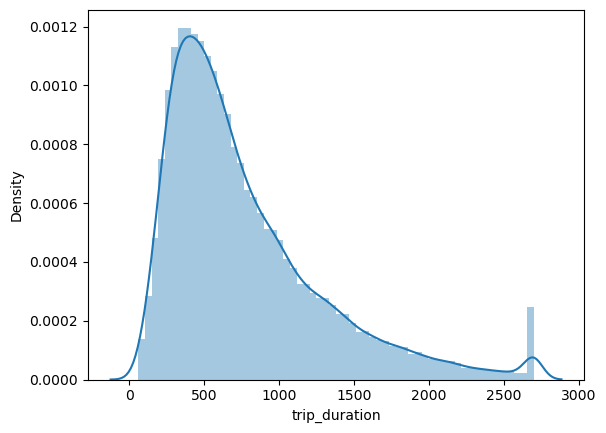

In [22]:
sns.distplot(citi_1['trip_duration'], bins=60) # Shows extreme values



In [23]:
# Define data types for specific columns
data_types = {
    'ride_start_date': 'datetime64'
}

In [30]:
file_path = os.path.join(path, '02 Data','prepared data','OGCiti_Bike2.csv')

In [44]:
parse_dates = ['start_of_ride']

In [45]:
citi_1 = pd.read_csv(file_path, parse_dates=parse_dates)

In [46]:
# amount of rides taken on each hour of each day
hour_counts = citi_1.groupby(['start_hour',citi_1['start_of_ride'].dt.date])['start_of_ride'].count()

In [47]:
hour_counts

start_hour  start_of_ride
0           2013-09-01       15
            2013-09-02       15
            2013-09-03        5
            2013-09-04        9
            2013-09-05       13
                             ..
23          2013-09-26       38
            2013-09-27       44
            2013-09-28       48
            2013-09-29       21
            2013-09-30       17
Name: start_of_ride, Length: 711, dtype: int64

In [48]:
# average rides per hour
avg_rides_per_hour = hour_counts.groupby('start_hour').mean().reset_index()

In [49]:
avg_rides_per_hour

start_hour  start_of_ride
0            0      14.000000
1            1       8.866667
2            2       5.586207
3            3       3.692308
4            4       2.777778
5            5       6.724138
6            6      29.633333
7            7      66.000000
8            8     104.233333
9            9      86.600000
10          10      60.900000
11          11      61.366667
12          12      78.433333
13          13      80.266667
14          14      80.033333
15          15      81.200000
16          16     101.533333
17          17     146.600000
18          18     142.666667
19          19      97.666667
20          20      64.400000
21          21      45.700000
22          22      38.633333
23          23      26.766667

In [50]:
day_counts = citi_1.groupby('day_of_week')['start_of_ride'].count().reset_index()

In [51]:
day_counts

day_of_week  start_of_ride
0         Fri           6594
1         Mon           6797
2         Sat           4965
3         Sun           5506
4         Thu           6212
5         Tue           6429
6         Wed           6490

In [53]:
day_hour_counts = citi_1.groupby([ 'day_of_week','start_hour'])['start_of_ride'].count()

In [54]:
day_hour_counts

day_of_week  start_hour
Fri          0              48
             1              36
             2              23
             3              10
             4              10
                          ... 
Wed          19            479
             20            297
             21            213
             22            188
             23            103
Name: start_of_ride, Length: 168, dtype: int64

In [55]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

citi_1.plot(x = 'start_hour', y='trip_duration',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('length of trip vs hour of ride')  
plt.xlabel('start_hour')  
plt.ylabel('trip_duration')  
plt.show()

In [56]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

citi_1.plot(x = 'day_of_week', y='trip_duration',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('length of trip vs day of ride')  
plt.xlabel('day_of_week')  
plt.ylabel('trip_duration')  
plt.show()

In [57]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

citi_1.plot(x = 'birth_year', y='trip_duration',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('length of trip vs age ')  
plt.xlabel('birth_year')  
plt.ylabel('trip_duration')  
plt.show()

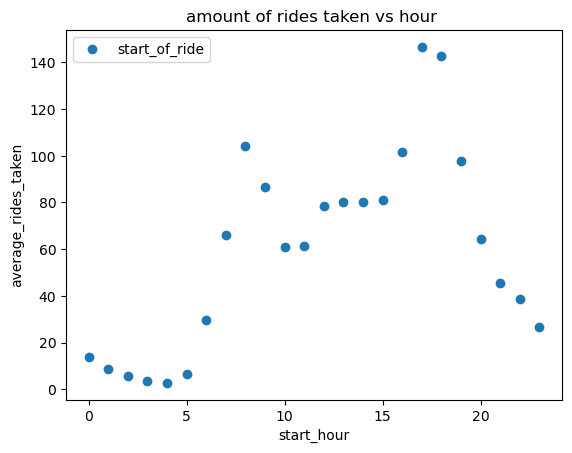

In [59]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

avg_rides_per_hour.plot(x = 'start_hour', y='start_of_ride',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('amount of rides taken vs hour ')  
plt.xlabel('start_hour')  
plt.ylabel('average_rides_taken')  
plt.show()

In [60]:
avg_rides_per_hour

start_hour  start_of_ride
0            0      14.000000
1            1       8.866667
2            2       5.586207
3            3       3.692308
4            4       2.777778
5            5       6.724138
6            6      29.633333
7            7      66.000000
8            8     104.233333
9            9      86.600000
10          10      60.900000
11          11      61.366667
12          12      78.433333
13          13      80.266667
14          14      80.033333
15          15      81.200000
16          16     101.533333
17          17     146.600000
18          18     142.666667
19          19      97.666667
20          20      64.400000
21          21      45.700000
22          22      38.633333
23          23      26.766667

In [61]:
citi_1.columns

Index(['Unnamed: 0', 'day_of_week', 'start_hour', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'trip_duration',
       'subscriber', 'birth_year', 'gender', 'start_of_ride', 'end_of_ride',
       'duration group'],
      dtype='object')

In [62]:
ride_counts = pd.get_dummies(citi_1, columns=['day_of_week', 'start_hour'], drop_first=True)

In [63]:
ride_counts

Unnamed: 0  start_station_id       start_station_name  \
0               0               523          W 38 St & 8 Ave   
1               1               257  Lispenard St & Broadway   
2               2               479          9 Ave & W 45 St   
3               3               527          E 33 St & 1 Ave   
4               4               293    Lafayette St & E 8 St   
...           ...               ...                      ...   
42988       42988               435          W 21 St & 6 Ave   
42989       42989               224    Spruce St & Nassau St   
42990       42990               261     Johnson St & Gold St   
42991       42991               402       Broadway & E 22 St   
42992       42992               515         W 43 St & 10 Ave   

       start_station_latitude  start_station_longitude  end_station_id  \
0                   40.754666               -73.991382             334   
1                   40.719392               -74.002472             236   
2                   40.760193               -73.991255             513   
3                   40.743156               -73.974347             441   
4                   40.730287               -73.990765             432   
...                       ...                      ...             ...   
42988               40.741740               -73.994156             448   
42989               40.711464               -74.005524             301   
42990               40.694749               -73.983625             151   
42991               40.740343               -73.989551             524   
42992               40.760094               -73.994618             488   

               end_station_name  end_station_latitude  end_station_longitude  \
0               W 20 St & 7 Ave             40.742388             -73.997262   
1           St Marks Pl & 2 Ave             40.728419             -73.987140   
2              W 56 St & 10 Ave             40.768254             -73.988639   
3               E 52 St & 2 Ave             40.756014             -73.967416   
4             E 7 St & Avenue A             40.726218             -73.983799   
...                         ...                   ...                    ...   
42988          W 37 St & 10 Ave             40.756604             -73.997901   
42989         E 2 St & Avenue B             40.722174             -73.983688   
42990  Cleveland Pl & Spring St             40.721816             -73.997203   
42991           W 43 St & 6 Ave             40.755273             -73.983169   
42992           W 39 St & 9 Ave             40.756458             -73.993722   

       trip_duration  ... start_hour_14  start_hour_15 start_hour_16  \
0                993  ...             0              0             0   
1                581  ...             0              0             0   
2                361  ...             0              0             0   
3                561  ...             0              0             0   
4                427  ...             0              0             0   
...              ...  ...           ...            ...           ...   
42988            975  ...             0              1             0   
42989           1541  ...             0              0             1   
42990           1191  ...             0              0             0   
42991           1050  ...             0              0             0   
42992            370  ...             0              0             0   

      start_hour_17 start_hour_18 start_hour_19  start_hour_20  start_hour_21  \
0                 0             1             0              0              0   
1                 0             1             0              0              0   
2                 0             0             1              0              0   
3                 0             0             0              0              0   
4                 0             0             0              0              0   
...             ...           ...    

In [64]:
ride_counts.columns

Index(['Unnamed: 0', 'start_station_id', 'start_station_name',
       'start_station_latitude', 'start_station_longitude', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'trip_duration', 'subscriber', 'birth_year', 'gender', 'start_of_ride',
       'end_of_ride', 'duration group', 'day_of_week_Mon', 'day_of_week_Sat',
       'day_of_week_Sun', 'day_of_week_Thu', 'day_of_week_Tue',
       'day_of_week_Wed', 'start_hour_1', 'start_hour_2', 'start_hour_3',
       'start_hour_4', 'start_hour_5', 'start_hour_6', 'start_hour_7',
       'start_hour_8', 'start_hour_9', 'start_hour_10', 'start_hour_11',
       'start_hour_12', 'start_hour_13', 'start_hour_14', 'start_hour_15',
       'start_hour_16', 'start_hour_17', 'start_hour_18', 'start_hour_19',
       'start_hour_20', 'start_hour_21', 'start_hour_22', 'start_hour_23'],
      dtype='object')

In [65]:
# rides per hour count
rides_per_hour_count = hour_counts.groupby('start_hour').count().reset_index()


In [67]:
# amount of rides taken on each hour of each day
hour_counts_1 = citi_1.groupby('start_hour')['start_of_ride'].count()

In [39]:
hour_counts_1

start_hour
0      420
1      266
2      162
3       96
4       75
5      195
6      889
7     1980
8     3127
9     2598
10    1827
11    1841
12    2353
13    2408
14    2401
15    2436
16    3046
17    4398
18    4280
19    2930
20    1932
21    1371
22    1159
23     803
Name: ride_start_date, dtype: int64

In [69]:
hourly_aggregated = citi_1.groupby('start_hour').agg({
    'start_of_ride': 'count',          # Count of rides
    'trip_duration': 'mean'              # Average trip duration
}).reset_index()


In [41]:
hourly_aggregated

start_hour  ride_start_date  trip_duration
0            0              420     748.716667
1            1              266     702.657895
2            2              162     659.561728
3            3               96     687.020833
4            4               75     667.106667
5            5              195     605.348718
6            6              889     648.613048
7            7             1980     727.038384
8            8             3127     756.595459
9            9             2598     728.346035
10          10             1827     745.684729
11          11             1841     760.065182
12          12             2353     732.083723
13          13             2408     748.196844
14          14             2401     788.499792
15          15             2436     784.350575
16          16             3046     809.883454
17          17             4398     822.308322
18          18             4280     826.911215
19          19             2930     782.310580
20          20             1932     776.412526
21          21             1371     771.610503
22          22             1159     742.789474
23          23              803     730.199253

In [70]:
hourly_aggregated.rename(columns={'start_of_ride': 'ride_count', 'trip_duration': 'avg_trip_duration'}, inplace=True)

In [71]:
hourly_aggregated

start_hour  ride_count  avg_trip_duration
0            0         420         748.716667
1            1         266         702.657895
2            2         162         659.561728
3            3          96         687.020833
4            4          75         667.106667
5            5         195         605.348718
6            6         889         648.613048
7            7        1980         727.038384
8            8        3127         756.595459
9            9        2598         728.346035
10          10        1827         745.684729
11          11        1841         760.065182
12          12        2353         732.083723
13          13        2408         748.196844
14          14        2401         788.499792
15          15        2436         784.350575
16          16        3046         809.883454
17          17        4398         822.308322
18          18        4280         826.911215
19          19        2930         782.310580
20          20        1932         776.412526
21          21        1371         771.610503
22          22        1159         742.789474
23          23         803         730.199253

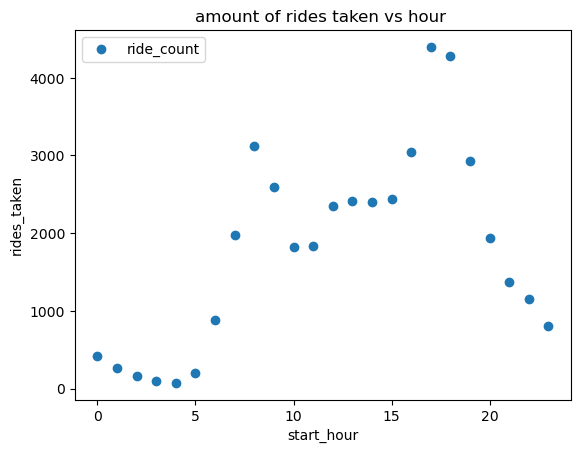

In [72]:
hourly_aggregated.plot(x = 'start_hour', y='ride_count',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('amount of rides taken vs hour ')  
plt.xlabel('start_hour')  
plt.ylabel('rides_taken')  
plt.show()

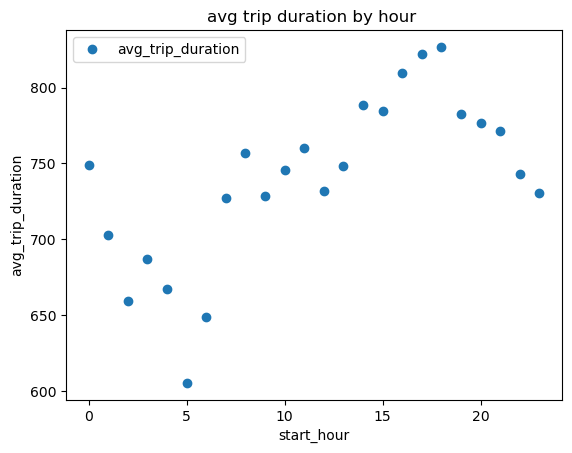

In [73]:
hourly_aggregated.plot(x = 'start_hour', y='avg_trip_duration',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('avg trip duration by hour ')  
plt.xlabel('start_hour')  
plt.ylabel('avg_trip_duration')  
plt.show()

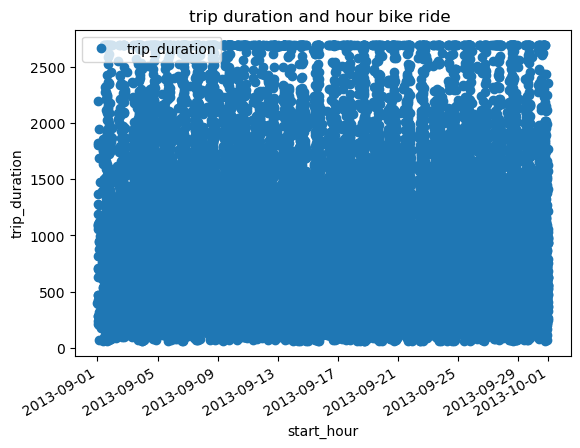

In [75]:
citi_1.plot(x = 'start_of_ride', y='trip_duration',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('trip duration and hour bike ride ')  
plt.xlabel('start_hour')  
plt.ylabel('trip_duration')  
plt.show()

In [76]:
citi_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42993 entries, 0 to 42992
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0               42993 non-null  int64         
 1   day_of_week              42993 non-null  object        
 2   start_hour               42993 non-null  int64         
 3   start_station_id         42993 non-null  int64         
 4   start_station_name       42993 non-null  object        
 5   start_station_latitude   42993 non-null  float64       
 6   start_station_longitude  42993 non-null  float64       
 7   end_station_id           42993 non-null  int64         
 8   end_station_name         42993 non-null  object        
 9   end_station_latitude     42993 non-null  float64       
 10  end_station_longitude    42993 non-null  float64       
 11  trip_duration            42993 non-null  int64         
 12  subscriber               42993 n

In [77]:
# Define data types for specific columns
data_types = {
    'ride_start_time': 'datetime64'
}

In [80]:
file_path_1 = os.path.join(path, '02 Data','Prepared data','OGCiti_Bike2.csv')

In [83]:
parse_dates = ['start_of_ride']

In [84]:
citi_1 = pd.read_csv(file_path_1, parse_dates=parse_dates)

In [52]:
citi_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42993 entries, 0 to 42992
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0.2             42993 non-null  int64         
 1   Unnamed: 0.1             42993 non-null  int64         
 2   Unnamed: 0               42993 non-null  int64         
 3   day_of_week              42993 non-null  object        
 4   start_hour               42993 non-null  int64         
 5   start_station_id         42993 non-null  int64         
 6   start_station_name       42993 non-null  object        
 7   start_station_latitude   42993 non-null  float64       
 8   start_station_longitude  42993 non-null  float64       
 9   end_station_id           42993 non-null  int64         
 10  end_station_name         42993 non-null  object        
 11  end_station_latitude     42993 non-null  float64       
 12  end_station_longitude    42993 n

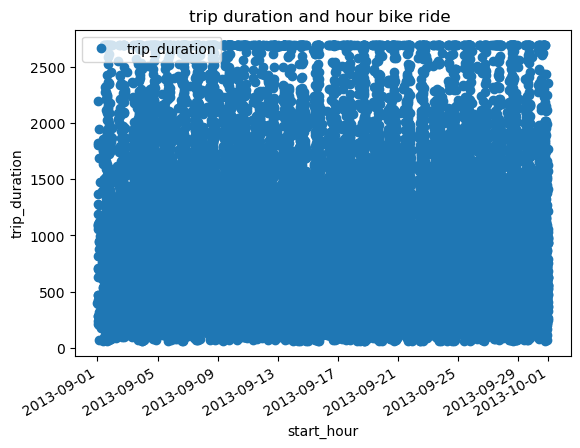

In [86]:
citi_1.plot(x = 'start_of_ride', y='trip_duration',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('trip duration and hour bike ride ')  
plt.xlabel('start_hour')  
plt.ylabel('trip_duration')  
plt.show()

In [87]:
hourly_aggregated = citi_1.groupby('start_hour').agg({
    'start_of_ride': 'count',          # Count of rides
    'trip_duration': 'mean'              # Average trip duration
}).reset_index()


In [88]:
hourly_aggregated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   start_hour     24 non-null     int64  
 1   start_of_ride  24 non-null     int64  
 2   trip_duration  24 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 708.0 bytes


In [90]:
hourly_aggregated.rename(columns={'start_of_ride': 'ride_count', 'trip_duration': 'avg_trip_duration'}, inplace=True)

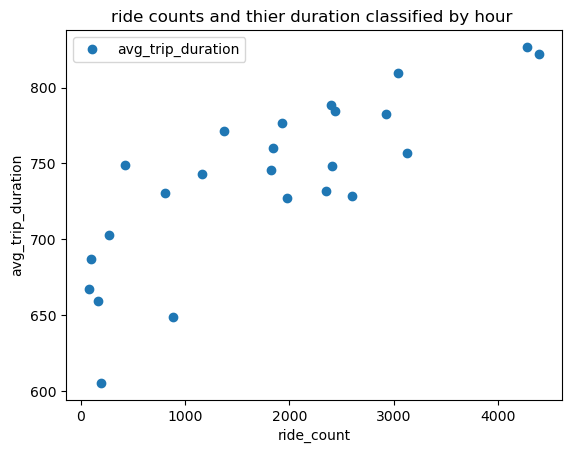

In [91]:
hourly_aggregated.plot(x = 'ride_count', y='avg_trip_duration',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('ride counts and thier duration classified by hour ')  
plt.xlabel('ride_count')  
plt.ylabel('avg_trip_duration')  
plt.show()

### Busier hours have longer rides more often

In [92]:
#using iqr method to look for outliers

In [93]:
q1=hourly_aggregated['ride_count'].quantile(0.25)#first Quartile
q3=hourly_aggregated['ride_count'].quantile(0.75)#third Quartile
iqr = q3-q1

In [94]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [95]:
outliers = hourly_aggregated[(hourly_aggregated['ride_count'] < lower_bound) | (hourly_aggregated['ride_count'] > upper_bound)]

In [96]:
outliers

Empty DataFrame
Columns: [start_hour, ride_count, avg_trip_duration]
Index: []

In [97]:
q1=hourly_aggregated['avg_trip_duration'].quantile(0.25)#first Quartile
q3=hourly_aggregated['avg_trip_duration'].quantile(0.75)#third Quartile
iqr = q3-q1

In [98]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [99]:
outliers_1 = hourly_aggregated[(hourly_aggregated['avg_trip_duration'] < lower_bound) | (hourly_aggregated['avg_trip_duration'] > upper_bound)]

In [100]:
# there are outliers!
outliers_1

start_hour  ride_count  avg_trip_duration
5           5         195         605.348718

In [101]:
#finding outliers in the main dateset
q1=citi_1['trip_duration'].quantile(0.25)#first Quartile
q3=citi_1['trip_duration'].quantile(0.75)#third Quartile
iqr = q3-q1

In [102]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [103]:
outliers_2 = citi_1[(citi_1['trip_duration'] < lower_bound) | (citi_1['trip_duration'] > upper_bound)]

In [104]:
outliers_2

Unnamed: 0 day_of_week  start_hour  start_station_id  \
27             27         Thu          16               471   
55             55         Wed          17               469   
179           179         Mon          14               342   
183           183         Tue          10               391   
197           197         Thu          17              2006   
...           ...         ...         ...               ...   
42837       42837         Sun          18               448   
42902       42902         Tue           7               278   
42903       42903         Sun          16               242   
42909       42909         Mon          16               493   
42969       42969         Wed           8               469   

               start_station_name  start_station_latitude  \
27        Grand St & Havemeyer St               40.712868   
55             Broadway & W 53 St               40.763441   
179    Columbia St & Rivington St               40.717400   
183           Clark St & Henry St               40.697601   
197        Central Park S & 6 Ave               40.765909   
...                           ...                     ...   
42837            W 37 St & 10 Ave               40.756604   
42902      Concord St & Bridge St               40.697666   
42903  Flushing Ave & Carlton Ave               40.697883   
42909             W 45 St & 6 Ave               40.756800   
42969          Broadway & W 53 St               40.763441   

       start_station_longitude  end_station_id            end_station_name  \
27                  -73.956981             388            W 26 St & 10 Ave   
55                  -73.982681             313   Washington Ave & Park Ave   
179                 -73.980166             342  Columbia St & Rivington St   
183                 -73.993446             486          Broadway & W 29 St   
197                 -73.976342            2006      Central Park S & 6 Ave   
...                        ...             ...                         ...   
42837               -73.997901             514            12 Ave & W 40 St   
42902               -73.984764             352             W 56 St & 6 Ave   
42903               -73.973503             526             E 33 St & 5 Ave   
42909               -73.982912             501         FDR Drive & E 35 St   
42969               -73.982681             316      Fulton St & William St   

       end_station_latitude  end_station_longitude  trip_duration  subscriber  \
27                40.749718             -74.002950           2057  Subscriber   
55                40.696102             -73.967510           2262  Subscriber   
179               40.717400             -73.980166           2093  Subscriber   
183               40.746201             -73.988557           2124  Subscriber   
197               40.765909             -73.976342           2251  Subscriber   
...                     ...                    ...            ...         ...   
42837             40.760875             -74.002777           2697  Subscriber   
42902             40.763406             -73.977225           2252  Subscriber   
42903             40.747659             -73.984907           2697  Subscriber   
42909             40.744219             -73.971212           2697  Subscriber   
42969             40.709560             -74.006536           1944  Subscriber   

       birth_year  gender       start_of_ride    end_of_ride duration group  
27           1954    male 2013-09-19 16:35:00  9/19/13 17:09      long_trip  
55           1979  female 2013-09-11 17:11:00  9/11/13 17:49      long_trip  
179          1960  female 2013-09-09 14:38:00   9/9/13 15:13      long_trip  
183          1957    male 2013-09-24 10:32:00  9/24/13 11:08      long_trip  
197          1963    male 2013-09-05 17:31:00   9/5/13 18:09      long_trip  
...           ...     ...                 ...            ...            ...  
42837        1990  female 2013-09-08 18:32:00   9/8/13 19:22 

In [105]:
outliers_2.shape

(1976, 18)

In [106]:
citi_1.shape

(42993, 18)

In [107]:
#removing outliers
filtered_citi = citi_1[(citi_1['trip_duration'] >= lower_bound) & (citi_1['trip_duration'] <= upper_bound)]

In [108]:
filtered_citi.shape

(41017, 18)

# Looking for Other Variables to Test

In [110]:
day_counts = citi_1.groupby('day_of_week')['start_of_ride'].count().reset_index()

In [79]:
day_counts

day_of_week  ride_start_date
0         Fri             6594
1         Mon             6797
2         Sat             4965
3         Sun             5506
4         Thu             6212
5         Tue             6429
6         Wed             6490

In [111]:
daily_aggregated = citi_1.groupby('day_of_week').agg({
    'start_of_ride': 'count',          # Count of rides
    'trip_duration': 'mean'              # Average trip duration
}).reset_index()


In [112]:
daily_aggregated

day_of_week  start_of_ride  trip_duration
0         Fri           6594     764.061723
1         Mon           6797     761.585552
2         Sat           4965     804.035045
3         Sun           5506     814.107701
4         Thu           6212     750.656632
5         Tue           6429     749.886452
6         Wed           6490     763.153621

In [113]:
daily_aggregated.rename(columns={'start_of_ride': 'ride_count', 'trip_duration': 'avg_trip_duration'}, inplace=True)

In [114]:
daily_aggregated.plot(x = 'ride_count', y='avg_trip_duration',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('ride counts and thier duration classified by day ')  
plt.xlabel('ride_count')  
plt.ylabel('avg_trip_duration')  
plt.show()

### Hypothesis:  Trip durations will be longer and more prevalent during the busier hours of operations

# Reshape Variables into NumPy Arrays & Put Into Separate Objects

In [115]:
X = hourly_aggregated['ride_count'].values.reshape(-1,1)
y = hourly_aggregated['avg_trip_duration'].values.reshape(-1,1)

In [116]:
X

array([[ 420],
       [ 266],
       [ 162],
       [  96],
       [  75],
       [ 195],
       [ 889],
       [1980],
       [3127],
       [2598],
       [1827],
       [1841],
       [2353],
       [2408],
       [2401],
       [2436],
       [3046],
       [4398],
       [4280],
       [2930],
       [1932],
       [1371],
       [1159],
       [ 803]])

In [117]:
y

array([[748.71666667],
       [702.65789474],
       [659.5617284 ],
       [687.02083333],
       [667.10666667],
       [605.34871795],
       [648.61304837],
       [727.03838384],
       [756.59545891],
       [728.34603541],
       [745.68472906],
       [760.06518197],
       [732.08372291],
       [748.19684385],
       [788.49979175],
       [784.35057471],
       [809.88345371],
       [822.30832196],
       [826.91121495],
       [782.3105802 ],
       [776.41252588],
       [771.61050328],
       [742.78947368],
       [730.1992528 ]])

In [202]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [203]:
# Create a regression object.

regression = LinearRegression() 

In [204]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [205]:
# Predict the values of y using X. applying model just to X test

#--By only applying it to the “X_test” data set, you’re telling the model to predict the corresponding y values. Once it does this, you can compare it to the actual y values in the “y_test” data set and determine the accuracy of the model.

y_predicted = regression.predict(X_test)

In [ ]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =15)
plot_test.title('ride counts and trip duration (Test set)')
plot_test.xlabel('ride_counts')
plot_test.ylabel('trip_duration')
plot_test.show()

Note: Error when reloading this to turn in but i have the Graph screenshot saved

Regression line has positive regression appearance. This means more rides occurring leads to longer average rides. Though it is a positive slope the line is not that close.

In [207]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [208]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [0.02367214 2.46911331]
Mean squared error:  275.28355316856425
R2 score:  -0.03130702942259189


In [ ]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

Note: Error when reloading this to turn in but i have the Graph screenshot saved

### The model did not perform perfectly and this explains to me that the relationship is not great for reference.

### Potential Biases: Inaccurately logged ride durations may lead to potential bias

### For linear regression to have a relationship is difficult with only two variables. This data set feels more in the realm of categoric because of the columns of data we have to work with here.

In [211]:
# saving to csv
citi_1.to_csv(os.path.join(path, '02 Data','Prepared data', 'citi_6.4.csv'))

### ^^^ Dropped outliers using IQR method, seeing how it reads now

In [212]:
hourly_aggregated_filtered = filtered_citi.groupby('start_hour').agg({
    'start_of_ride': 'count',          # Count of rides
    'trip_duration': 'mean'              # Average trip duration
}).reset_index()


In [213]:
hourly_aggregated_filtered

start_hour  start_of_ride  trip_duration
0            0            403     677.868486
1            1            257     647.210117
2            2            158     620.936709
3            3             90     584.422222
4            4             73     616.589041
5            5            191     570.586387
6            6            863     598.979143
7            7           1908     668.484277
8            8           3023     705.284155
9            9           2504     668.774760
10          10           1759     681.419557
11          11           1747     675.744133
12          12           2258     666.543401
13          13           2306     679.187771
14          14           2259     693.548915
15          15           2316     705.407599
16          16           2866     713.957083
17          17           4122     722.178554
18          18           4041     741.052215
19          19           2817     720.935037
20          20           1848     708.226190
21          21           1319     707.300986
22          22           1109     674.930568
23          23            780     686.223077

In [214]:
hourly_aggregated_filtered.rename(columns={'start_of_ride': 'ride_count', 'trip_duration': 'avg_trip_duration'}, inplace=True)

In [215]:
hourly_aggregated_filtered.plot(x = 'ride_count', y='avg_trip_duration',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('ride counts and thier duration classified by hour_no outliers ')  
plt.xlabel('ride_count')  
plt.ylabel('avg_trip_duration')  
plt.show()

In [216]:
X_1 = hourly_aggregated_filtered['ride_count'].values.reshape(-1,1)
y_1 = hourly_aggregated_filtered['avg_trip_duration'].values.reshape(-1,1)

In [217]:
# Split data into a training set and a test set.

X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.3, random_state=42)

In [218]:
# Create a regression object.

regression = LinearRegression() 

In [219]:
# Fit the regression object onto the training set.

regression.fit(X_1_train, y_1_train)

LinearRegression()

In [220]:
# Predict the values of y using X. applying model just to X test

#--By only applying it to the “X_test” data set, you’re telling the model to predict the corresponding y values. Once it does this, you can compare it to the actual y values in the “y_test” data set and determine the accuracy of the model.

y_1_predicted = regression.predict(X_1_test)

In [221]:
# Create a plot that shows the regression line from the model on the test set.

plot_test_1 = plt
plot_test_1.scatter(X_1_test, y_1_test, color='gray', s = 15)
plot_test_1.plot(X_1_test, y_1_predicted, color='red', linewidth =3)
plot_test_1.title('ride counts and trip duration no outliers (Test set)')
plot_test_1.xlabel('ride_counts')
plot_test_1.ylabel('average_trip_duration')
plot_test_1.show()

### Pos. Reg. still and it does not look perfect still. 

In [222]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_1_test, y_1_predicted) # This is the mean squared error
r2 = r2_score(y_1_test, y_1_predicted) # This is the R2 score. 

In [223]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.03503481]]
Mean squared error:  604.4295810846346
R2 score:  0.21346354916799082


### Rndm state is now 42, changing r2 score

In [224]:
# Create a dataframe comparing the actual and predicted values of y.

data_1 = pd.DataFrame({'Actual': y_1_test.flatten(), 'Predicted': y_1_predicted.flatten()})
data.head(30)

Actual   Predicted
0  760.065182  732.755282
1  745.684729  732.230727
2  742.789474  707.201956
3  788.499792  753.737485
4  776.412526  736.164890
5  702.657895  673.742836
6  748.196844  753.999763
7  730.199253  693.863270

In [225]:
# no signifigant difference when outliers were removed

In [226]:
hourly_aggregated_filtered.head()

start_hour  ride_count  avg_trip_duration
0           0         403         677.868486
1           1         257         647.210117
2           2         158         620.936709
3           3          90         584.422222
4           4          73         616.589041

In [227]:
citi_1.head()

Unnamed: 0 day_of_week  start_hour  start_station_id  \
0           0         Mon          18               523   
1           1         Thu          18               257   
2           2         Wed          19               479   
3           3         Sat          11               527   
4           4         Fri          22               293   

        start_station_name  start_station_latitude  start_station_longitude  \
0          W 38 St & 8 Ave               40.754666               -73.991382   
1  Lispenard St & Broadway               40.719392               -74.002472   
2          9 Ave & W 45 St               40.760193               -73.991255   
3          E 33 St & 1 Ave               40.743156               -73.974347   
4    Lafayette St & E 8 St               40.730287               -73.990765   

   end_station_id     end_station_name  end_station_latitude  \
0             334      W 20 St & 7 Ave             40.742388   
1             236  St Marks Pl & 2 Ave             40.728419   
2             513     W 56 St & 10 Ave             40.768254   
3             441      E 52 St & 2 Ave             40.756014   
4             432    E 7 St & Avenue A             40.726218   

   end_station_longitude  trip_duration  subscriber  birth_year  gender  \
0             -73.997262            993  Subscriber        1968  female   
1             -73.987140            581  Subscriber        1983    male   
2             -73.988639            361  Subscriber        1989    male   
3             -73.967416            561  Subscriber        1988  female   
4             -73.983799            427  Subscriber        1986  female   

        start_of_ride    end_of_ride duration group  
0 2013-09-09 18:18:00   9/9/13 18:35    normal_trip  
1 2013-09-12 18:38:00  9/12/13 18:48    normal_trip  
2 2013-09-18 19:44:00  9/18/13 19:50     small_trip  
3 2013-09-28 11:54:00  9/28/13 12:03    normal_trip  
4 2013-09-27 22:01:00  9/27/13 22:08    normal_trip

In [228]:
citi_clean=citi_1[['day_of_week','start_hour',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'trip_duration',
       'subscriber', 'birth_year', 'gender', 'start_of_ride', 'end_of_ride']]

In [229]:
hourly_aggregated_filtered.head()

start_hour  ride_count  avg_trip_duration
0           0         403         677.868486
1           1         257         647.210117
2           2         158         620.936709
3           3          90         584.422222
4           4          73         616.589041

In [230]:
hourly_aggregated_filtered['avg_trip_duration_min']=hourly_aggregated_filtered['avg_trip_duration']/60

In [231]:
hourly_aggregated_filtered

start_hour  ride_count  avg_trip_duration  avg_trip_duration_min
0            0         403         677.868486              11.297808
1            1         257         647.210117              10.786835
2            2         158         620.936709              10.348945
3            3          90         584.422222               9.740370
4            4          73         616.589041              10.276484
5            5         191         570.586387               9.509773
6            6         863         598.979143               9.982986
7            7        1908         668.484277              11.141405
8            8        3023         705.284155              11.754736
9            9        2504         668.774760              11.146246
10          10        1759         681.419557              11.356993
11          11        1747         675.744133              11.262402
12          12        2258         666.543401              11.109057
13          13        2306         679.187771              11.319796
14          14        2259         693.548915              11.559149
15          15        2316         705.407599              11.756793
16          16        2866         713.957083              11.899285
17          17        4122         722.178554              12.036309
18          18        4041         741.052215              12.350870
19          19        2817         720.935037              12.015584
20          20        1848         708.226190              11.803770
21          21        1319         707.300986              11.788350
22          22        1109         674.930568              11.248843
23          23         780         686.223077              11.437051

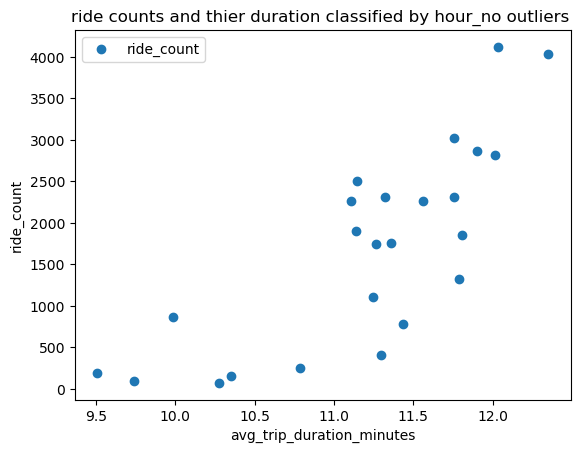

In [232]:
hourly_aggregated_filtered.plot(x = 'avg_trip_duration_min', y='ride_count',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('ride counts and thier duration classified by hour_no outliers ')  
plt.xlabel('avg_trip_duration_minutes')  
plt.ylabel('ride_count')  
plt.show()

In [233]:
X_1 = hourly_aggregated_filtered['avg_trip_duration_min'].values.reshape(-1,1)
y_1 = hourly_aggregated_filtered['ride_count'].values.reshape(-1,1)

In [234]:
# Predict the values of y using X. applying model just to X test

#--By only applying it to the “X_test” data set, you’re telling the model to predict the corresponding y values. Once it does this, you can compare it to the actual y values in the “y_test” data set and determine the accuracy of the model.

y_1_predicted = regression.predict(X_1_test)

In [235]:
# Create a plot that shows the regression line from the model on the test set.

plot_test_1 = plt
plot_test_1.scatter(X_1_test, y_1_test, color='gray', s = 15)
plot_test_1.plot(X_1_test, y_1_predicted, color='red', linewidth =3)
plot_test_1.title('ride counts and trip duration no outliers (Test set)')
plot_test_1.xlabel('avg_trip_duration_min')
plot_test_1.ylabel('ride_counts')
plot_test_1.show()

In [236]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_1_test, y_1_predicted) # This is the mean squared error
r2 = r2_score(y_1_test, y_1_predicted) # This is the R2 score. 

In [237]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.03503481]]
Mean squared error:  604.4295810846346
R2 score:  0.21346354916799082


In [238]:
ride_counts.head()

Unnamed: 0  start_station_id       start_station_name  \
0           0               523          W 38 St & 8 Ave   
1           1               257  Lispenard St & Broadway   
2           2               479          9 Ave & W 45 St   
3           3               527          E 33 St & 1 Ave   
4           4               293    Lafayette St & E 8 St   

   start_station_latitude  start_station_longitude  end_station_id  \
0               40.754666               -73.991382             334   
1               40.719392               -74.002472             236   
2               40.760193               -73.991255             513   
3               40.743156               -73.974347             441   
4               40.730287               -73.990765             432   

      end_station_name  end_station_latitude  end_station_longitude  \
0      W 20 St & 7 Ave             40.742388             -73.997262   
1  St Marks Pl & 2 Ave             40.728419             -73.987140   
2     W 56 St & 10 Ave             40.768254             -73.988639   
3      E 52 St & 2 Ave             40.756014             -73.967416   
4    E 7 St & Avenue A             40.726218             -73.983799   

   trip_duration  ... start_hour_14  start_hour_15 start_hour_16  \
0            993  ...             0              0             0   
1            581  ...             0              0             0   
2            361  ...             0              0             0   
3            561  ...             0              0             0   
4            427  ...             0              0             0   

  start_hour_17 start_hour_18 start_hour_19  start_hour_20  start_hour_21  \
0             0             1             0              0              0   
1             0             1             0              0              0   
2             0             0             1              0              0   
3             0             0             0              0              0   
4             0             0             0              0              0   

   start_hour_22  start_hour_23  
0              0              0  
1              0              0  
2              0              0  
3              0              0  
4              1              0  

[5 rows x 45 columns]

In [239]:
X=hourly_aggregated_filtered[['start_hour','avg_trip_duration']]

In [240]:
import statsmodels.api as sm

In [241]:
X = sm.add_constant(X)

In [242]:
y = hourly_aggregated_filtered['ride_count']

In [243]:
model = sm.OLS(y, X).fit()

In [244]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             ride_count   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     17.77
Date:                Sun, 17 Sep 2023   Prob (F-statistic):           3.04e-05
Time:                        22:03:58   Log-Likelihood:                -191.95
No. Observations:                  24   AIC:                             389.9
Df Residuals:                      21   BIC:                             393.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.286e+04   3088.69

In [245]:
# Define the predictor variable (start_hour) and dependent variables (count and avg_trip_duration)
X = hourly_aggregated_filtered['start_hour']
y_count = hourly_aggregated_filtered['ride_count']
y_avg_duration = hourly_aggregated_filtered['avg_trip_duration']


In [246]:
X = sm.add_constant(X)

In [247]:
model_count = sm.OLS(y_count, X).fit()

In [248]:
model_avg_duration = sm.OLS(y_avg_duration, X).fit()


In [249]:
print("Model for Count of Rides:")
print(model_count.summary())
print("\nModel for Average Trip Duration:")
print(model_avg_duration.summary())

Model for Count of Rides:
                            OLS Regression Results                            
Dep. Variable:             ride_count   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     8.843
Date:                Sun, 17 Sep 2023   Prob (F-statistic):            0.00701
Time:                        22:04:03   Log-Likelihood:                -199.78
No. Observations:                  24   AIC:                             403.6
Df Residuals:                      22   BIC:                             405.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        658.2067    4

In [250]:
X = hourly_aggregated_filtered[['avg_trip_duration', 'start_hour']]
X = sm.add_constant(X)



In [251]:
y = hourly_aggregated_filtered['ride_count']

In [252]:
model = sm.OLS(y, X).fit()

In [253]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             ride_count   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     17.77
Date:                Sun, 17 Sep 2023   Prob (F-statistic):           3.04e-05
Time:                        22:04:07   Log-Likelihood:                -191.95
No. Observations:                  24   AIC:                             389.9
Df Residuals:                      21   BIC:                             393.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.286e+04   3088.69

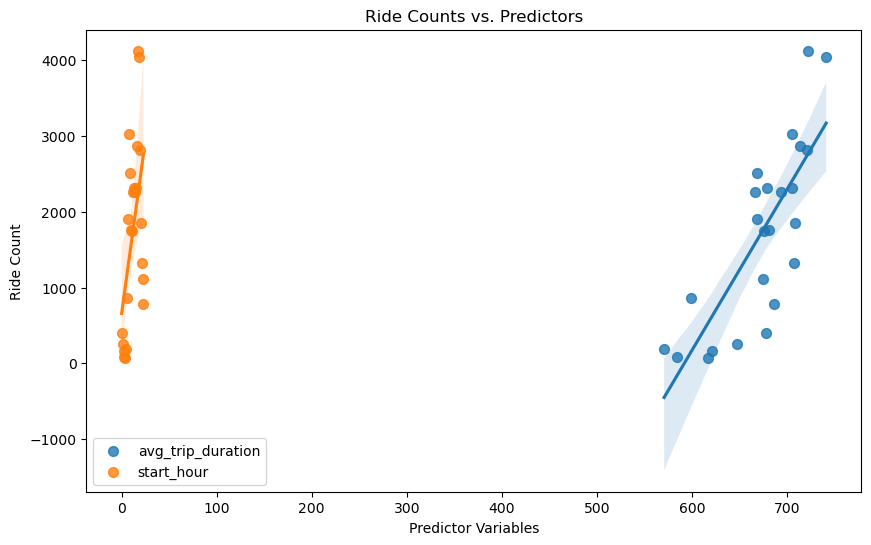

In [254]:
plt.figure(figsize=(10, 6))
sns.regplot(x='avg_trip_duration', y='ride_count', data=hourly_aggregated_filtered, scatter_kws={'s': 50}, label='avg_trip_duration')
sns.regplot(x='start_hour', y='ride_count', data=hourly_aggregated_filtered, scatter_kws={'s': 50}, label='start_hour')
plt.title('Ride Counts vs. Predictors')
plt.xlabel('Predictor Variables')
plt.ylabel('Ride Count')
plt.legend()
plt.show()

In [255]:
X = hourly_aggregated_filtered[['ride_count', 'start_hour']]
X = sm.add_constant(X)


In [256]:
y = hourly_aggregated_filtered['avg_trip_duration']

In [257]:
model = sm.OLS(y, X).fit()

In [258]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      avg_trip_duration   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     28.41
Date:                Sun, 17 Sep 2023   Prob (F-statistic):           1.06e-06
Time:                        22:04:13   Log-Likelihood:                -109.22
No. Observations:                  24   AIC:                             224.4
Df Residuals:                      21   BIC:                             228.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        606.9446     10.244     59.248      0.0

In [259]:
plt.figure(figsize=(10, 6))
sns.regplot(x='ride_count', y='avg_trip_duration', data=hourly_aggregated_filtered, scatter_kws={'s': 50}, label='avg_trip_duration')
sns.regplot(x='start_hour', y='avg_trip_duration', data=hourly_aggregated_filtered, scatter_kws={'s': 50}, label='start_hour')
plt.title('avg_trip_duration vs. Predictors')
plt.xlabel('Predictor Variables')
plt.ylabel('avg_trip_duration')
plt.legend()
plt.show()

In [260]:
# Reshape the variables into NumPy arrays
X_avg_trip_duration = hourly_aggregated_filtered['ride_count'].values
y_avg_trip_duration = hourly_aggregated_filtered['avg_trip_duration'].values

X_start_hour = hourly_aggregated_filtered['start_hour'].values
y_avg_trip_duration = hourly_aggregated_filtered['avg_trip_duration'].values


In [261]:
plt.figure(figsize=(10, 6))
sns.regplot(x=X_avg_trip_duration, y=y_avg_trip_duration, scatter_kws={'s': 50}, label='avg_trip_duration')
sns.regplot(x=X_start_hour, y=y_avg_trip_duration, scatter_kws={'s': 50}, label='start_hour')
plt.title('avg_trip_duration vs. Predictors')
plt.xlabel('Predictor Variables')
plt.ylabel('avg_trip_duration')
plt.legend()
plt.show()

In [262]:
X = hourly_aggregated_filtered[['ride_count', 'start_hour']]  
y = hourly_aggregated_filtered['avg_trip_duration']  

In [263]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  

In [264]:
# Create a regression object.

regression = LinearRegression() 

In [265]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [266]:
# Predict the values of y using X. applying model just to X test

#--By only applying it to the “X_test” data set, you’re telling the model to predict the corresponding y values. Once it does this, you can compare it to the actual y values in the “y_test” data set and determine the accuracy of the model.

y_predicted = regression.predict(X_test)

In [267]:
# Define the predictor variables (X) and the target variable (y)
X = hourly_aggregated_filtered[['ride_count', 'start_hour']]  
y = hourly_aggregated_filtered['avg_trip_duration']  

# Make sure X and y have the same number of data points
assert len(X) == len(y), "X and y must have the same number of data points"

In [ ]:
y_predicted = fitted_model.predict(X_test)

In [269]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (24, 2)
Shape of y: (24,)


In [270]:
y

0     677.868486
1     647.210117
2     620.936709
3     584.422222
4     616.589041
5     570.586387
6     598.979143
7     668.484277
8     705.284155
9     668.774760
10    681.419557
11    675.744133
12    666.543401
13    679.187771
14    693.548915
15    705.407599
16    713.957083
17    722.178554
18    741.052215
19    720.935037
20    708.226190
21    707.300986
22    674.930568
23    686.223077
Name: avg_trip_duration, dtype: float64

In [271]:
X

ride_count  start_hour
0          403           0
1          257           1
2          158           2
3           90           3
4           73           4
5          191           5
6          863           6
7         1908           7
8         3023           8
9         2504           9
10        1759          10
11        1747          11
12        2258          12
13        2306          13
14        2259          14
15        2316          15
16        2866          16
17        4122          17
18        4041          18
19        2817          19
20        1848          20
21        1319          21
22        1109          22
23         780          23

In [272]:
citi_1.head()

Unnamed: 0 day_of_week  start_hour  start_station_id  \
0           0         Mon          18               523   
1           1         Thu          18               257   
2           2         Wed          19               479   
3           3         Sat          11               527   
4           4         Fri          22               293   

        start_station_name  start_station_latitude  start_station_longitude  \
0          W 38 St & 8 Ave               40.754666               -73.991382   
1  Lispenard St & Broadway               40.719392               -74.002472   
2          9 Ave & W 45 St               40.760193               -73.991255   
3          E 33 St & 1 Ave               40.743156               -73.974347   
4    Lafayette St & E 8 St               40.730287               -73.990765   

   end_station_id     end_station_name  end_station_latitude  \
0             334      W 20 St & 7 Ave             40.742388   
1             236  St Marks Pl & 2 Ave             40.728419   
2             513     W 56 St & 10 Ave             40.768254   
3             441      E 52 St & 2 Ave             40.756014   
4             432    E 7 St & Avenue A             40.726218   

   end_station_longitude  trip_duration  subscriber  birth_year  gender  \
0             -73.997262            993  Subscriber        1968  female   
1             -73.987140            581  Subscriber        1983    male   
2             -73.988639            361  Subscriber        1989    male   
3             -73.967416            561  Subscriber        1988  female   
4             -73.983799            427  Subscriber        1986  female   

        start_of_ride    end_of_ride duration group  
0 2013-09-09 18:18:00   9/9/13 18:35    normal_trip  
1 2013-09-12 18:38:00  9/12/13 18:48    normal_trip  
2 2013-09-18 19:44:00  9/18/13 19:50     small_trip  
3 2013-09-28 11:54:00  9/28/13 12:03    normal_trip  
4 2013-09-27 22:01:00  9/27/13 22:08    normal_trip

In [274]:
citi_1_clean=citi_1[['day_of_week','start_hour',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'trip_duration',
       'subscriber', 'birth_year', 'gender', 'end_of_ride',
       'start_of_ride']]

In [275]:
citi_1_clean

day_of_week  start_hour  start_station_id       start_station_name  \
0             Mon          18               523          W 38 St & 8 Ave   
1             Thu          18               257  Lispenard St & Broadway   
2             Wed          19               479          9 Ave & W 45 St   
3             Sat          11               527          E 33 St & 1 Ave   
4             Fri          22               293    Lafayette St & E 8 St   
...           ...         ...               ...                      ...   
42988         Sat          15               435          W 21 St & 6 Ave   
42989         Sun          16               224    Spruce St & Nassau St   
42990         Sat          17               261     Johnson St & Gold St   
42991         Sat          18               402       Broadway & E 22 St   
42992         Mon          21               515         W 43 St & 10 Ave   

       start_station_latitude  start_station_longitude  end_station_id  \
0                   40.754666               -73.991382             334   
1                   40.719392               -74.002472             236   
2                   40.760193               -73.991255             513   
3                   40.743156               -73.974347             441   
4                   40.730287               -73.990765             432   
...                       ...                      ...             ...   
42988               40.741740               -73.994156             448   
42989               40.711464               -74.005524             301   
42990               40.694749               -73.983625             151   
42991               40.740343               -73.989551             524   
42992               40.760094               -73.994618             488   

               end_station_name  end_station_latitude  end_station_longitude  \
0               W 20 St & 7 Ave             40.742388             -73.997262   
1           St Marks Pl & 2 Ave             40.728419             -73.987140   
2              W 56 St & 10 Ave             40.768254             -73.988639   
3               E 52 St & 2 Ave             40.756014             -73.967416   
4             E 7 St & Avenue A             40.726218             -73.983799   
...                         ...                   ...                    ...   
42988          W 37 St & 10 Ave             40.756604             -73.997901   
42989         E 2 St & Avenue B             40.722174             -73.983688   
42990  Cleveland Pl & Spring St             40.721816             -73.997203   
42991           W 43 St & 6 Ave             40.755273             -73.983169   
42992           W 39 St & 9 Ave             40.756458             -73.993722   

       trip_duration  subscriber  birth_year  gender    end_of_ride  \
0                993  Subscriber        1968  female   9/9/13 18:35   
1                581  Subscriber        1983    male  9/12/13 18:48   
2                361  Subscriber        1989    male  9/18/13 19:50   
3                561  Subscriber        1988  female  9/28/13 12:03   
4                427  Subscriber        1986  female  9/27/13 22:08   
...              ...         ...         ...     ...            ...   
42988            975  Subscriber        1973    male  9/28/13 15:46   
42989           1541  Subscriber        1975    male   9/1/13 16:52   
42990           1191  Subscriber        1970  female  9/14/13 17:52   
42991           1050  Subscriber        1961  female   9/7/13 18:25   
42992            370  Subscriber        1980  female  9/23/13 22:00   

            start_of_ride  
0     2013-09-09 18:18:00  
1     2013-09-12 18:38:00  
2     2013-09-18 19:44:00  
3     2013-09-28 11:54:00  
4     2013-09-27 22:01:00  
...                   ...  
42988 2013-09-28 15:30:00  
42989 2013-09-01 16:27:00  
42990 2013-09-14 17:32:00  
42991 2013-09-07 18:08:00  
42992 2013-09-23 21:54:00  

[42993 rows x 16 columns]

In [276]:
filtered_citi.head()

Unnamed: 0 day_of_week  start_hour  start_station_id  \
0           0         Mon          18               523   
1           1         Thu          18               257   
2           2         Wed          19               479   
3           3         Sat          11               527   
4           4         Fri          22               293   

        start_station_name  start_station_latitude  start_station_longitude  \
0          W 38 St & 8 Ave               40.754666               -73.991382   
1  Lispenard St & Broadway               40.719392               -74.002472   
2          9 Ave & W 45 St               40.760193               -73.991255   
3          E 33 St & 1 Ave               40.743156               -73.974347   
4    Lafayette St & E 8 St               40.730287               -73.990765   

   end_station_id     end_station_name  end_station_latitude  \
0             334      W 20 St & 7 Ave             40.742388   
1             236  St Marks Pl & 2 Ave             40.728419   
2             513     W 56 St & 10 Ave             40.768254   
3             441      E 52 St & 2 Ave             40.756014   
4             432    E 7 St & Avenue A             40.726218   

   end_station_longitude  trip_duration  subscriber  birth_year  gender  \
0             -73.997262            993  Subscriber        1968  female   
1             -73.987140            581  Subscriber        1983    male   
2             -73.988639            361  Subscriber        1989    male   
3             -73.967416            561  Subscriber        1988  female   
4             -73.983799            427  Subscriber        1986  female   

        start_of_ride    end_of_ride duration group  
0 2013-09-09 18:18:00   9/9/13 18:35    normal_trip  
1 2013-09-12 18:38:00  9/12/13 18:48    normal_trip  
2 2013-09-18 19:44:00  9/18/13 19:50     small_trip  
3 2013-09-28 11:54:00  9/28/13 12:03    normal_trip  
4 2013-09-27 22:01:00  9/27/13 22:08    normal_trip

In [278]:
citi_1_clean=filtered_citi[['day_of_week','start_hour',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'trip_duration',
       'subscriber', 'birth_year', 'gender', 'end_of_ride',
       'start_of_ride']]

In [279]:
# saving to csv
citi_1_clean.to_csv(os.path.join(path, '02 Data','prepared data', 'citi_NEW6.4.csv'))